In [4]:
from strkernel.mismatch_kernel import MismatchKernel
from strkernel.mismatch_kernel import preprocess
from Bio import SeqIO
from Bio.Seq import Seq
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

In [30]:
seq = [seq.seq[:10] for seq in SeqIO.parse('../../data/pseudo/concatenated.fasta', 'fasta')]

In [31]:
seq_processed = preprocess(seq, ignoreLower=False)

In [32]:
seq_processed

[[0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 1, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 1, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2, 0, 2, 3, 2, 0, 3, 1],
 [0, 3, 2,

In [33]:
%time kernel = MismatchKernel(l=5, k=5, m=1).get_kernel(seq_processed).kernel

CPU times: user 2.45 s, sys: 9.11 ms, total: 2.46 s
Wall time: 2.45 s


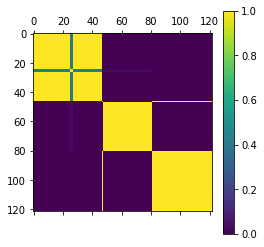

In [35]:
plt.matshow(kernel)
plt.colorbar()

In [24]:
mismatch_collection = ['aATGCg', 'ACGTTT', 'agATGC','TCACcg', 'cgTCTCGAgt']
# sequences = ['aatgcACGTTGAgatcg','acgtgACGTTTGacggt', 'agtccATGCTGTaagtc', 'gttccTCACCGTcgcgt', 'gtacgTCTCGCTgtcgt']
# preprocess
after_process = preprocess(mismatch_collection, ignoreLower=False)
# compute mismatch kernel
mismatch_kernel = MismatchKernel(l=5, k=5, m=1).get_kernel(after_process, normalize=False)

In [27]:
after_process

[[0, 0, 3, 2, 1, 2],
 [0, 1, 2, 3, 3, 3],
 [0, 2, 0, 3, 2, 1],
 [3, 1, 0, 1, 1, 2],
 [1, 2, 3, 1, 3, 1]]

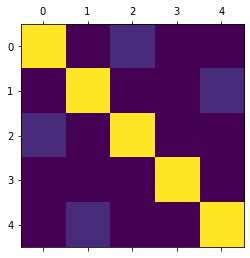

In [26]:
plt.matshow(mismatch_kernel.kernel)